# Air Force Cadet Career Problem (AFCCP) Non-Rated Line (NRL) Model Walkthrough 

## Part One (Data Wrangling)

## Part Two (Code Walkthrough)

Whatever script or .ipynb notebook you're running code from should be in the same root "afccp" directory. For example, the picture below is the directory that this notebook "AFCCP NRL Module Walkthrough.ipynb" is currectly in. The folders that I've circled in yellow may or may not be there for you, but they get created as soon as you import "afccp" into your code. 

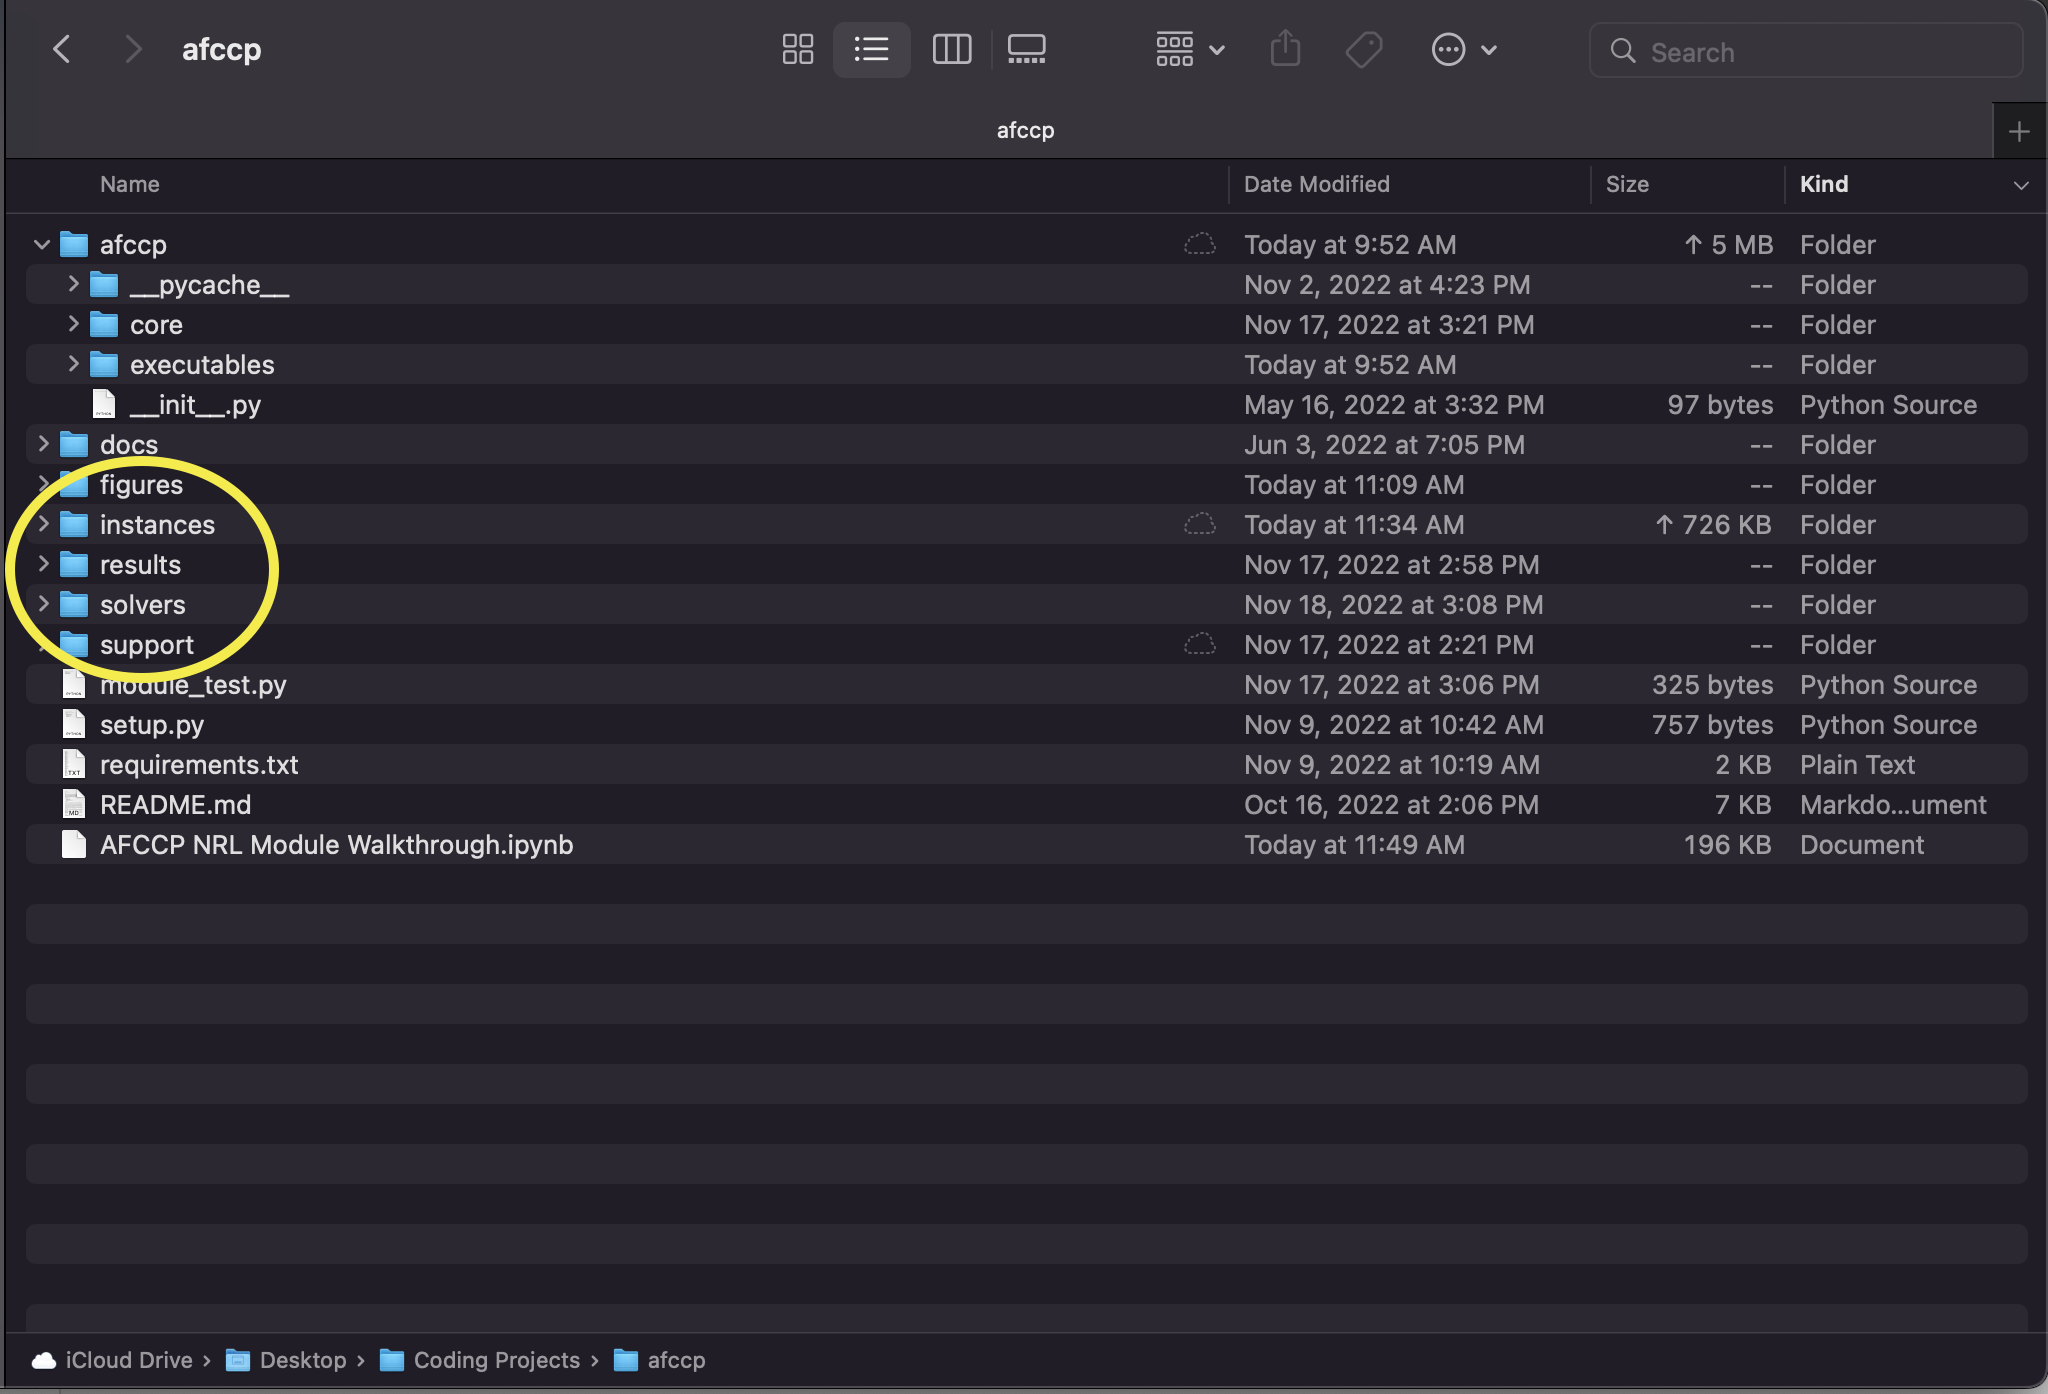

In [1]:
from IPython.display import Image
Image(filename='pic1.png')

Let's go ahead and import the module. I'm going to assume that you have afccp either installed or it's cloned into wherever you're looking at. You should also have all of the following packages installed as well.

In [2]:
import sys
!{sys.executable} -m pip list

Package              Version
-------------------- -----------
appnope              0.1.3
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.5
attrs                21.4.0
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               5.0.0
Brotli               1.0.9
certifi              2021.10.8
cffi                 1.15.0
charset-normalizer   2.0.12
click                8.1.3
copulas              0.6.1
cryptography         38.0.1
ctgan                0.5.1
cycler               0.11.0
dash                 2.6.1
dash-core-components 2.0.0
dash-html-components 2.0.0
dash-table           5.0.0
debugpy              1.6.0
decorator            5.1.1
deepecho             0.3.0.post1
defusedxml           0.7.1
entrypoints          0.4
et-xmlfile           1.1.0
executing            0.8.3
Faker                9.9.1
fastjsonschema       2.15.3
Flask                2.2.2
Flask-Compress       1.12
fonttools            4.31.2
graphviz             0.19.1
id

If you don't have all of the above packages, simply run the following code to install them from the requirements.txt file: (I commented it out for sake of the pdf length!)

In [3]:
# Install a pip package in the current Jupyter kernel
# !{sys.executable} -m pip install -r requirements.txt

### CadetCareerProblem Overview

Now that we have the required packages, let's import the "CadetCareerProblem" class from the "afccp" module. This is the main class object that we'll be dealing with. It represents the class of all cadet-AFSC matching problems (various cadet class years). Please note the two different meanings of the word "class" in the previous sentence! Each "instance" of CadetCareerProblem is a distinct academic class year (2019, 2020, 2021, etc.) with various cadet/AFSC parameters. Let's load in this class from the afccp module. If this is the first time you run this line, several folders will be created in your working directory (instances, figures, results, etc.)

In [4]:
from afccp.core.problem_class import CadetCareerProblem

Importing 'afccp' module...
Data folders found.
Pyomo module found.
SDV module found.
Sklearn Manifold module found.


The "instances" folder is where you will keep all of your problem instance files labeled according to their "data_name". The data names are the names of the class years or generated data. Things like 2019, 2020, 2021, or A, B, C, or Random_1, Random_2, Realistic_1, etc. for generated data. All that is needed in order to create a problem instance is the two sheets: Cadets_Fixed and AFSCs_Fixed

Here we will load in the two excel sheets (cadets/afscs fixed) for the class of 2023.

In [5]:
import pandas as pd
import os

# Obtain working directory
dir_path = os.getcwd() + '/'
print('Working directory:', dir_path)

filepath = dir_path + "instances/2023b.xlsx"
cadets_fixed = pd.read_excel(filepath, sheet_name="Cadets Fixed")
cadets_fixed

Working directory: /Users/griffenlaird/Desktop/Coding Projects/afccp/


,Cadet,Assigned,Male,Minority,Race,Ethnicity,USAFA,CIP1,CIP2,percentile,...,qual_62EXA,qual_62EXB,qual_62EXC,qual_62EXE,qual_62EXG,qual_62EXH,qual_62EXI,qual_63A,qual_64P,qual_65F
0,0,NaN,1,0,CAUCASIAN,UNKNOWN,0,520801,None,0.269828,...,I,I,I,I,I,I,I,D,D,D
1,1,NaN,1,0,CAUCASIAN,UNKNOWN,0,260202,None,0.931034,...,I,I,I,I,I,I,I,I,D,P
2,2,NaN,1,1,OTHER,MEXICAN AMERICAN,0,522101,None,0.429310,...,I,I,I,I,I,I,I,D,D,D
3,3,NaN,0,0,CAUCASIAN,NONE,0,150801,None,0.885345,...,I,I,I,I,I,I,I,I,D,P
4,4,NaN,1,0,CAUCASIAN,NONE,0,143501,None,0.964655,...,I,I,I,I,M,I,M,M,D,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,2566,NaN,0,0,CAUCASIAN,NaN,1,141001,None,0.970297,...,I,I,I,M,M,I,I,M,D,D
1530,2567,NaN,0,0,CAUCASIAN,NaN,1,141001,None,0.863861,...,I,I,I,M,M,I,I,M,D,D
1531,2568,NaN,1,0,CAUCASIAN,NaN,1,141001,None,0.599010,...,I,I,I,M,M,I,I,M,D,D
1532,3019,NaN,1,1,UNKNOWN,NaN,0,Unk,None,0.500000,...,I,I,I,I,I,I,I,I,P,P


In [6]:
afscs_fixed = pd.read_excel(filepath, sheet_name="AFSCs Fixed")
afscs_fixed

,AFSC,USAFA Target,ROTC Target,PGL Target,Real Target,Min,Max
0,13H,2,6,8,12,10,14
1,13M,3,16,19,28,19,27
2,13N,26,79,105,161,169,210
3,14F,2,5,7,9,7,8
4,14N,71,124,195,210,195,210
5,15A,14,21,35,64,60,72
6,15W,9,16,25,34,25,50
7,17X,52,129,181,193,181,193
8,21A,15,69,84,92,84,92
9,21M,17,12,29,29,29,38


Assuming you have these two excel sheets in a workbook called "2023b.xlsx" in the "instances" subfolder, then this next line should work! We're going to import these files to create a problem instance for "2023b".

In [7]:
instance = CadetCareerProblem("2023b")  # That's all you have to do! 

Importing 2023b problem instance...
Imported.


### Parameters

#### Structure Demo

The code will grab this data and load it into a "unique" data structure that I've created for this model. Rather than have a bunch of variables corresponding to the parameters of this problem, I created a dictionary called "parameters" which contains all of the necessary "fixed" parameters to the problem. The fixed parameters are the ones that you as an analyst can't really change. They're inherent characteristics about the cadets and the AFSCs. Most are loaded into the dictionary as numpy arrays of various sizes. These elements are mutable too which is very convenient. Let's take a look at some of them.

In [8]:
# Here is a list of all the "keys" to this dictionary
print(instance.parameters.keys())

dict_keys(['afsc_vector', 'P', 'quota', 'N', 'M', 'qual', 'quota_max', 'quota_min', 'utility', 'pgl', 'ID', 'assigned', 'ineligible', 'eligible', 'mandatory', 'desired', 'permitted', 'usafa', 'usafa_proportion', 'male', 'male_proportion', 'minority', 'minority_proportion', 'cip1', 'cip2', 'merit', 'merit_all', 'race', 'ethnicity', 'usafa_quota', 'rotc_quota', 'afsc_utility', 'I', 'J', 'J^E', 'J^P', 'I^E', 'num_eligible', 'I^P', 'I^D', 'sum_merit', 'J^Fixed'])


In [9]:
# This is just shorthand so I don't have to type "instance.parameters" everytime
p = instance.parameters

# Numbers of Cadets, AFSCs, and AFSC preferences, respectively
for param in ['N', 'M', 'P']:
    print(param + ':', p[param])

N: 1534
M: 32
P: 6


In [10]:
# Utility matrix  (Each row is a cadet, each column an AFSC)
print(instance.parameters['utility'])

[[0.   0.   0.   ... 0.75 1.   0.  ]
 [0.   0.75 0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.33 0.   0.  ]
 ...
 [0.   0.   0.   ... 0.65 0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


In [11]:
# Qualification matrix
print(instance.parameters['qual'])

[['I' 'P' 'P' ... 'D' 'D' 'D']
 ['I' 'P' 'P' ... 'I' 'D' 'P']
 ['I' 'P' 'P' ... 'D' 'D' 'D']
 ...
 ['I' 'P' 'M' ... 'M' 'D' 'D']
 ['I' 'P' 'P' ... 'I' 'P' 'P']
 ['I' 'P' 'P' ... 'I' 'P' 'P']]


In [12]:
# Array of AFSCs
print(instance.parameters['afsc_vector'])

['13H' '13M' '13N' '14F' '14N' '15A' '15W' '17X' '21A' '21M' '21R' '31P'
 '32EXA' '32EXC' '32EXE' '32EXF' '32EXG' '32EXJ' '35P' '38F' '61C' '61D'
 '62EXA' '62EXB' '62EXC' '62EXE' '62EXG' '62EXH' '62EXI' '63A' '64P' '65F'
 '*']


The * indicates the "unmatched AFSC" which is useful for the stable marriage stuff

In [13]:
# Sets of cadets and AFSCs
for param in ['I', 'J']:
    print(param, p[param])

I [   0    1    2 ... 1531 1532 1533]
J [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


These are purely the indices of the cadets and the AFSCs, nothing else. This is not the "ID" of the cadet.

In [14]:
# Here is the list of cadet ID's!
print(p["ID"])

[   0    1    2 ... 2568 3019 3020]


In [18]:
# Set of cadets that are eligible for the AFSC at index 23 (which happens to be 62EXB)
print('cadet indices:', p['I^E'][23], '\n')
print('AFSC at index 23:', p["afsc_vector"][23])

cadet indices: [   7   14   22   65   69   89  128  152  161  166  168  309  350  391
  412  420  472  475  509  534  603  612  709  731  754  756  763  773
  789  792  815  857  873  877  933  992 1044 1049 1072 1079 1365 1366
 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376 1377 1378] 

AFSC at index 23: 62EXB


In [19]:
# Set of USAFA cadets that are eligible for the AFSC at index 23
print('USAFA cadet indices', p['I^D']['USAFA Proportion'][23]) 

# ['I^D'][objective][AFSC index] is how I do it there^^^^
pass

USAFA cadet indices [1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376 1377 1378]


In [21]:
# Set of AFSCs for which the cadet at index 0 is eligible
print('AFSC indices', p['J^E'][0])
print('AFSC names', p['afsc_vector'][p['J^E'][0]])

AFSC indices [ 1  2  4  7  8  9 10 11 18 19 29 30 31]
AFSC names ['13M' '13N' '14N' '17X' '21A' '21M' '21R' '31P' '35P' '38F' '63A' '64P'
 '65F']


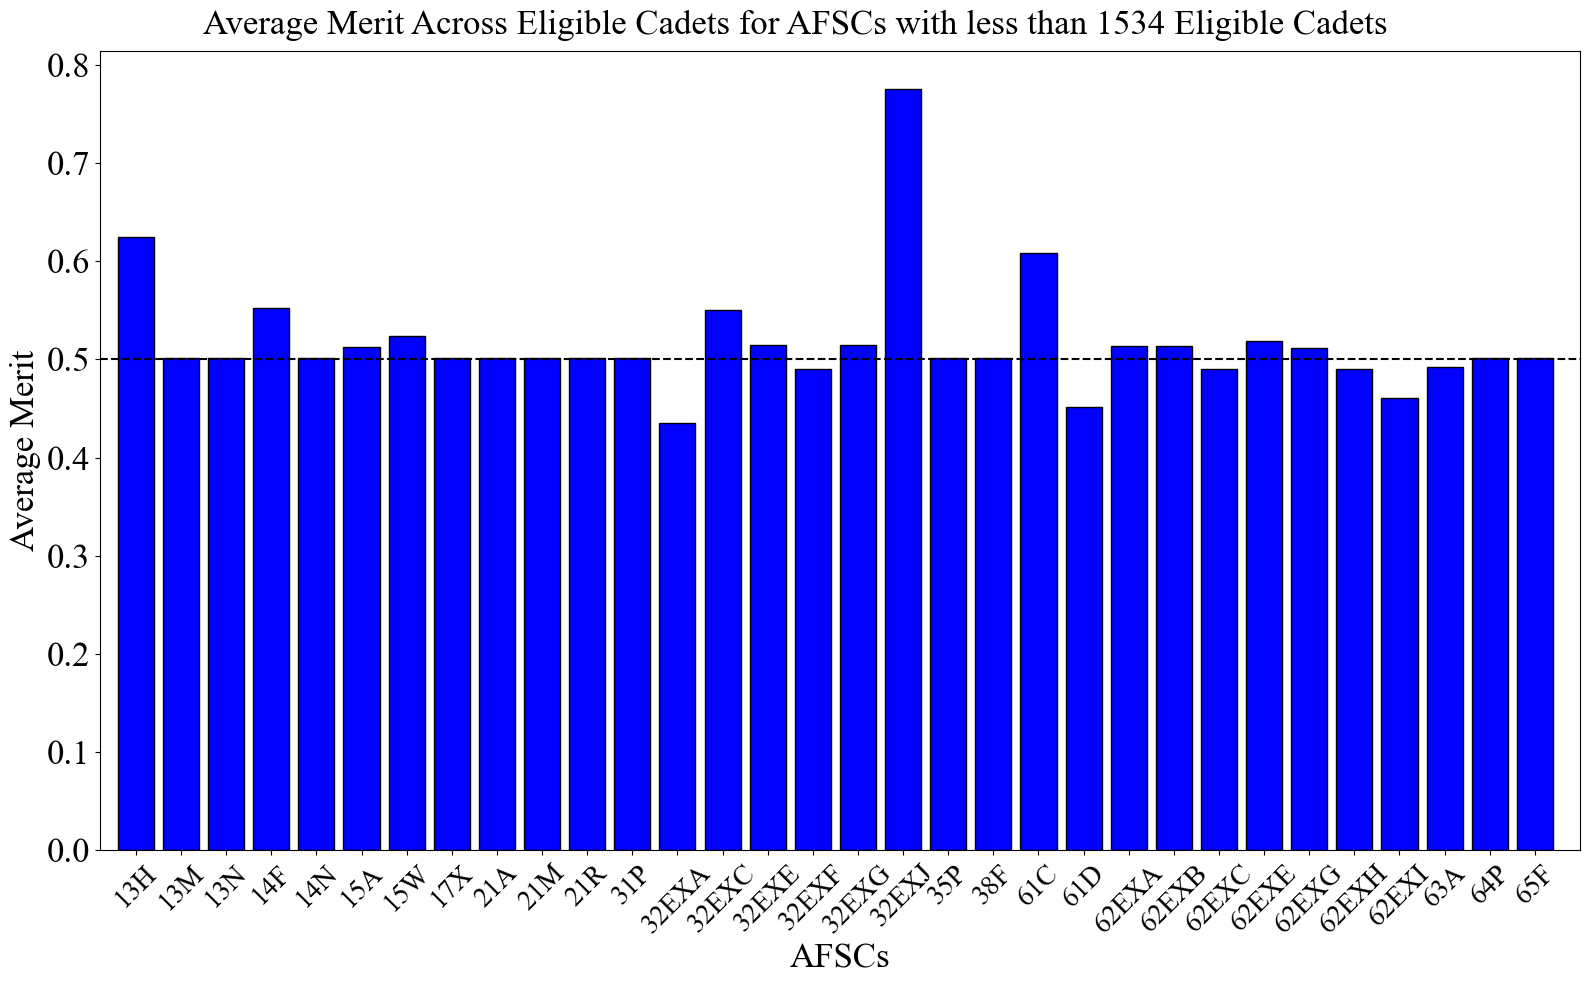

In [26]:
# Now let's show the data using one of our methods
chart = instance.display_data_graph({"graph":'Average Merit', "save": False, "bar_color": "blue"})

There are many other parameters to this method that control the size of the different fonts, colors, titles, and so on.

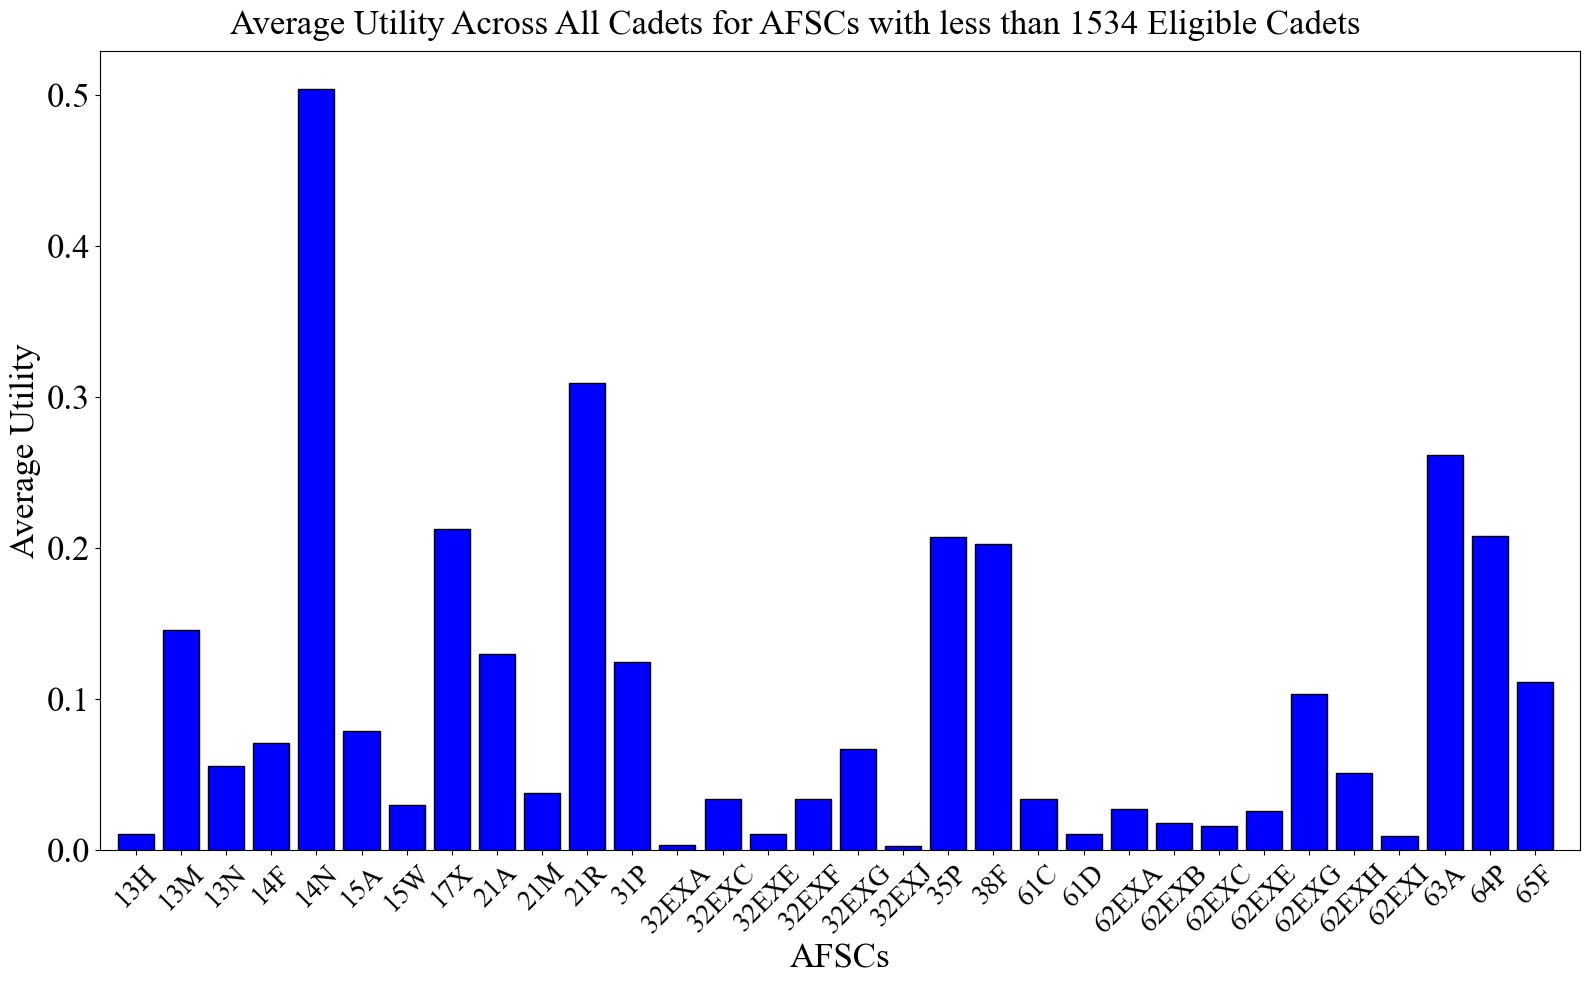

In [27]:
# We can look at the average utility placed on each of the AFSCs
chart = instance.display_data_graph({"graph": "Average Utility", "eligibility": False})

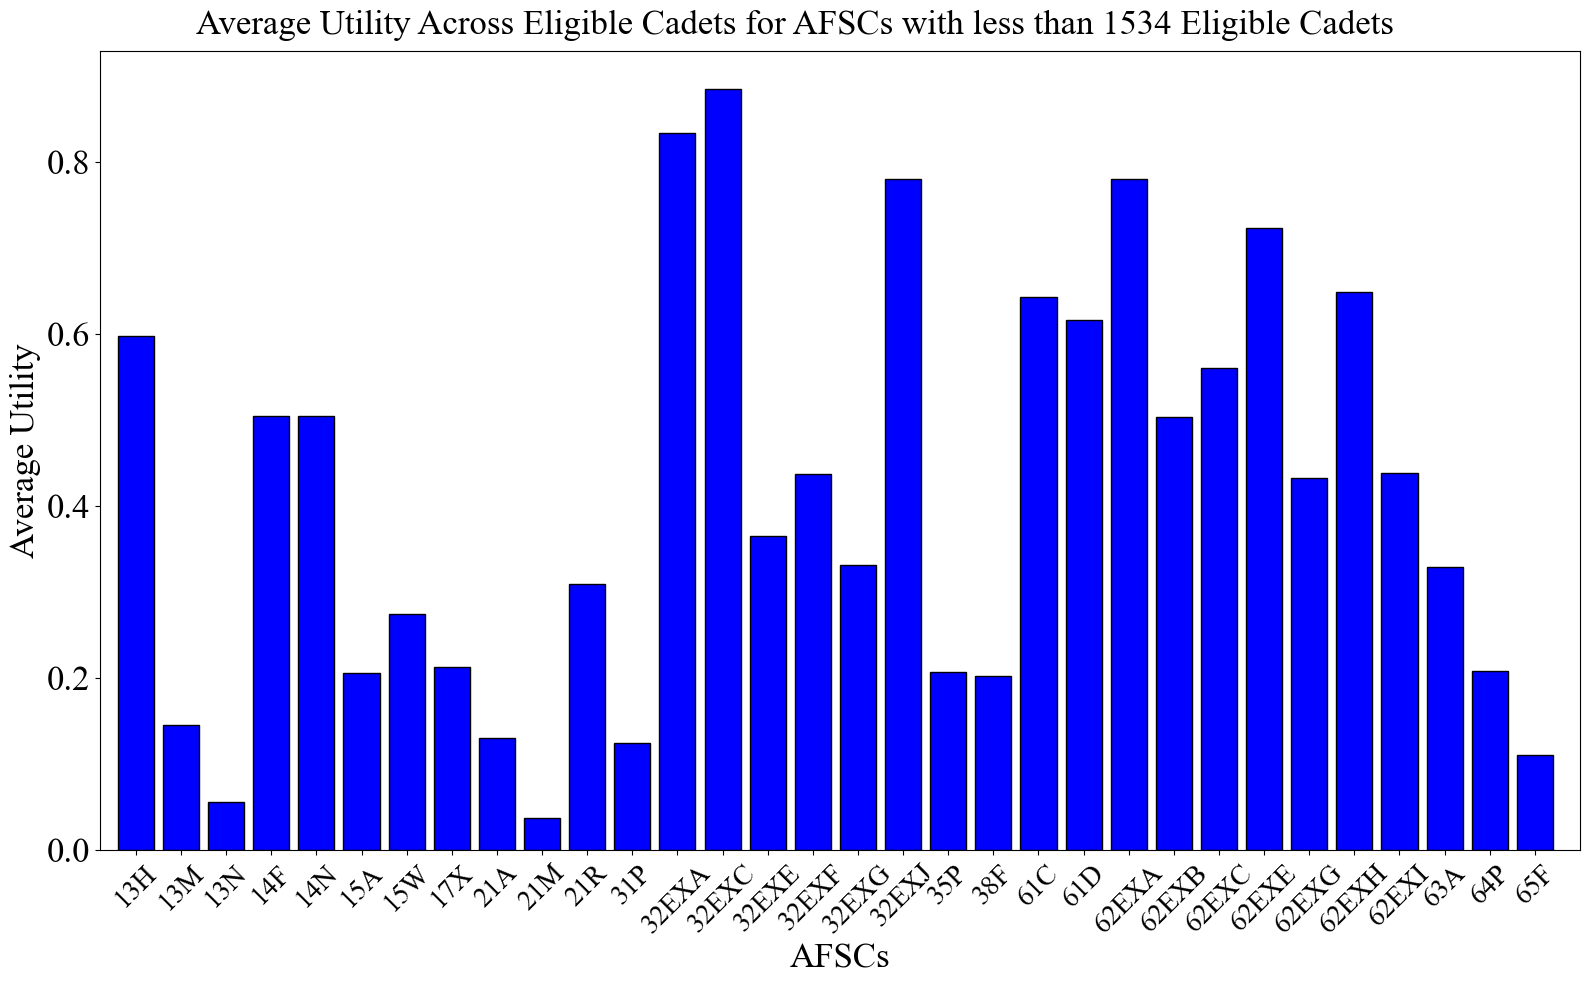

In [28]:
# We can also look at the average utility placed on each of the AFSCs of the set of eligible cadets for each AFSC
chart = instance.display_data_graph({"graph": "Average Utility", "eligibility": True}) 

# This is probably more fair since most cadets aren't going to place preferences on AFSCs they're not eligible for
pass

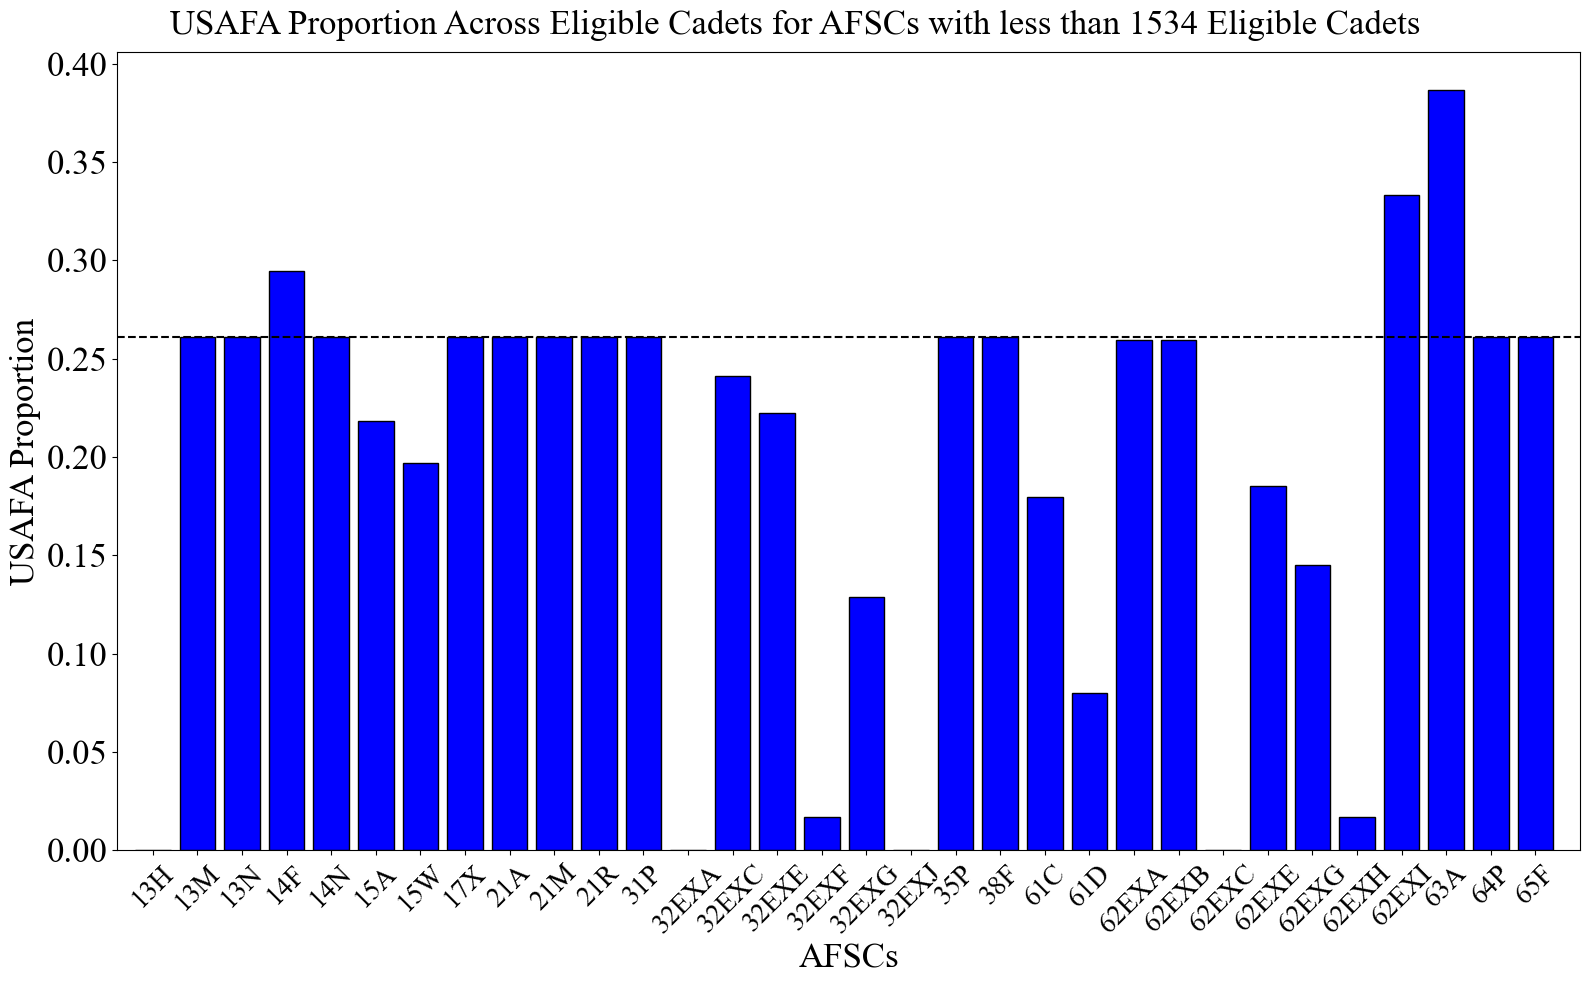

In [29]:
chart = instance.display_data_graph({"graph": 'USAFA Proportion'}) 

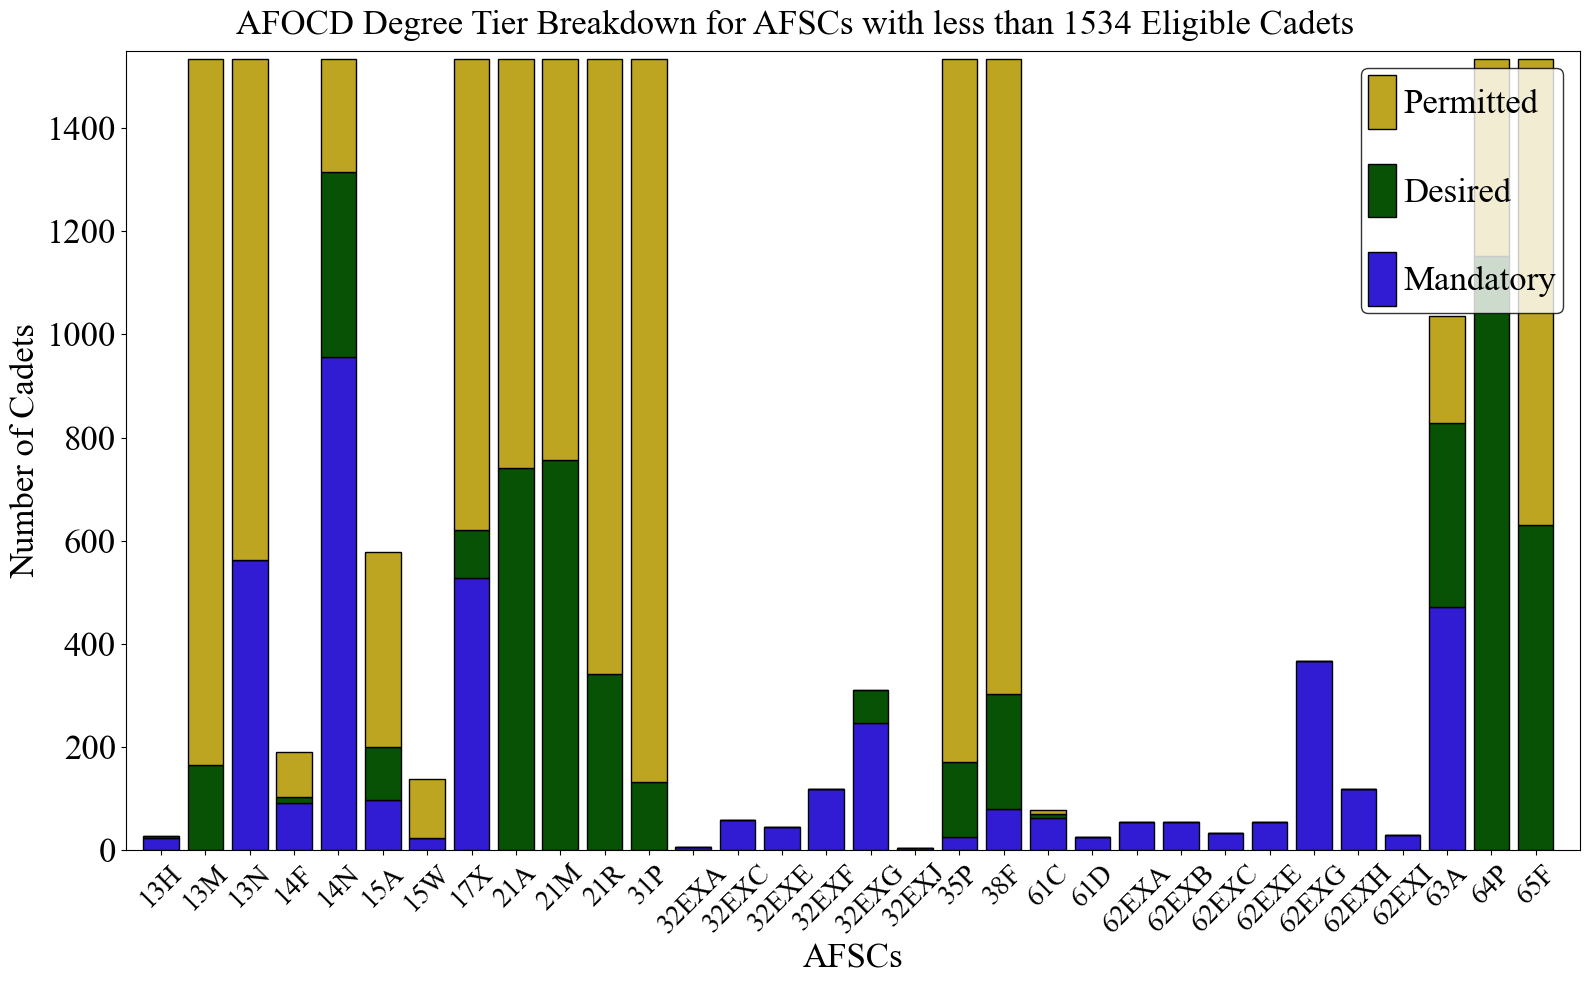

In [30]:
chart = instance.display_data_graph({"graph": 'AFOCD Data'}) 

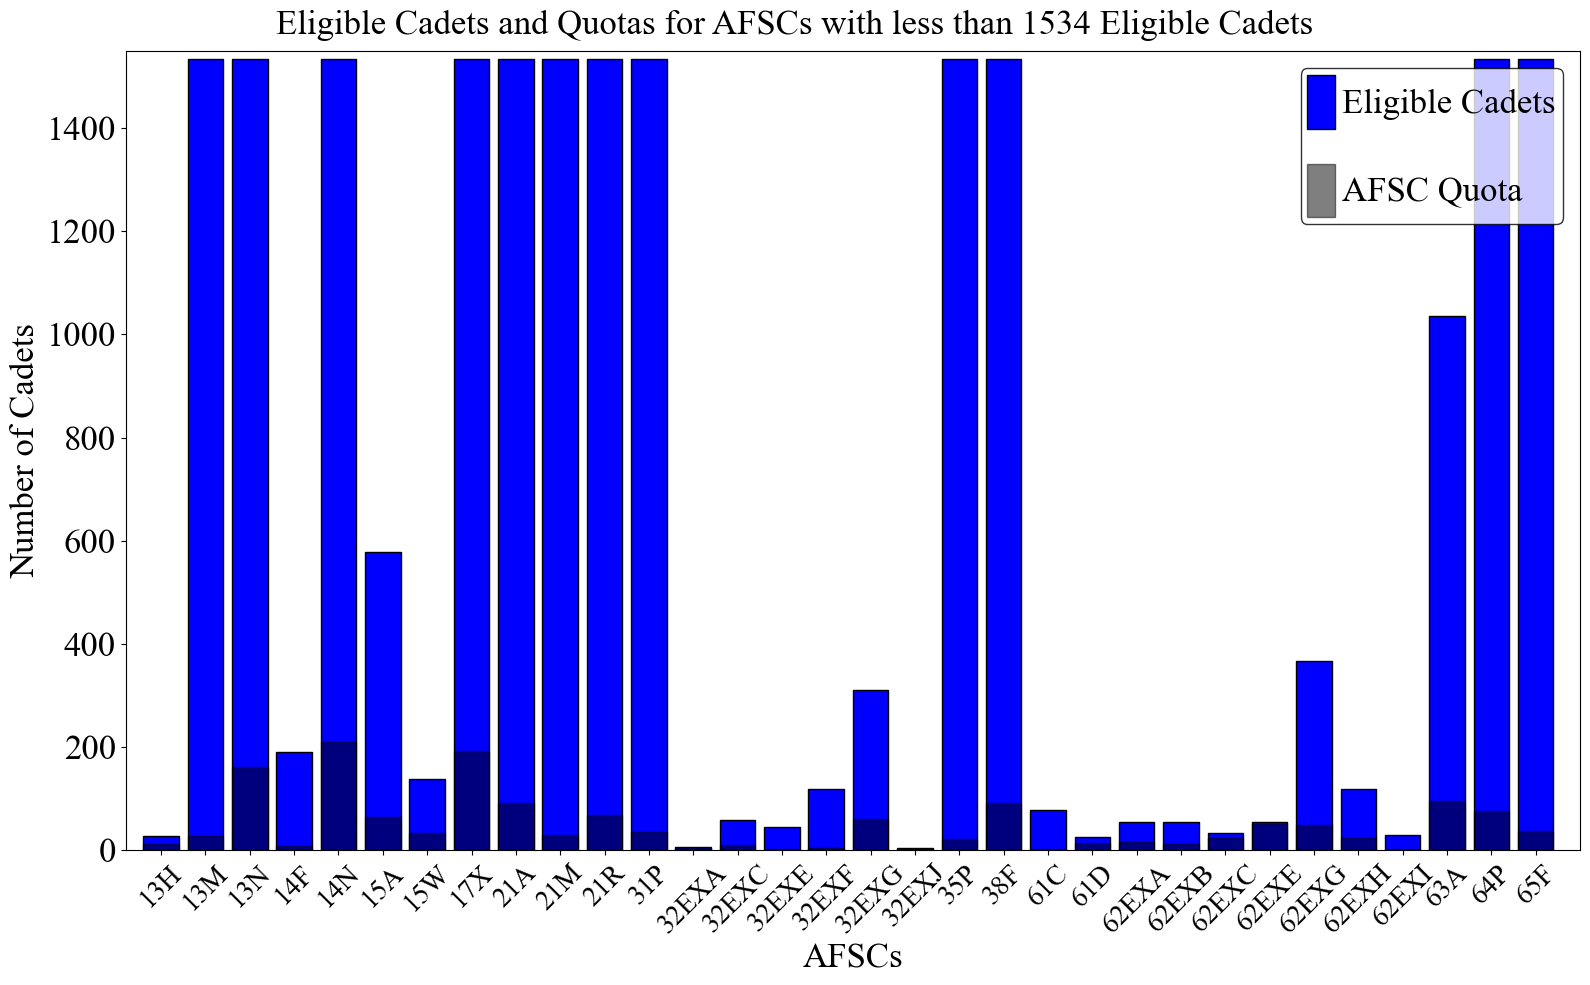

In [31]:
chart = instance.display_data_graph({"graph": 'Eligible Quota'})

One thing you'll notice is that the title always says "for AFSCs with less than 1778 Eligible Cadets". This is because we can also "zoom in" on the smaller AFSCs if need be using the "eligibility_limit" parameter. For example

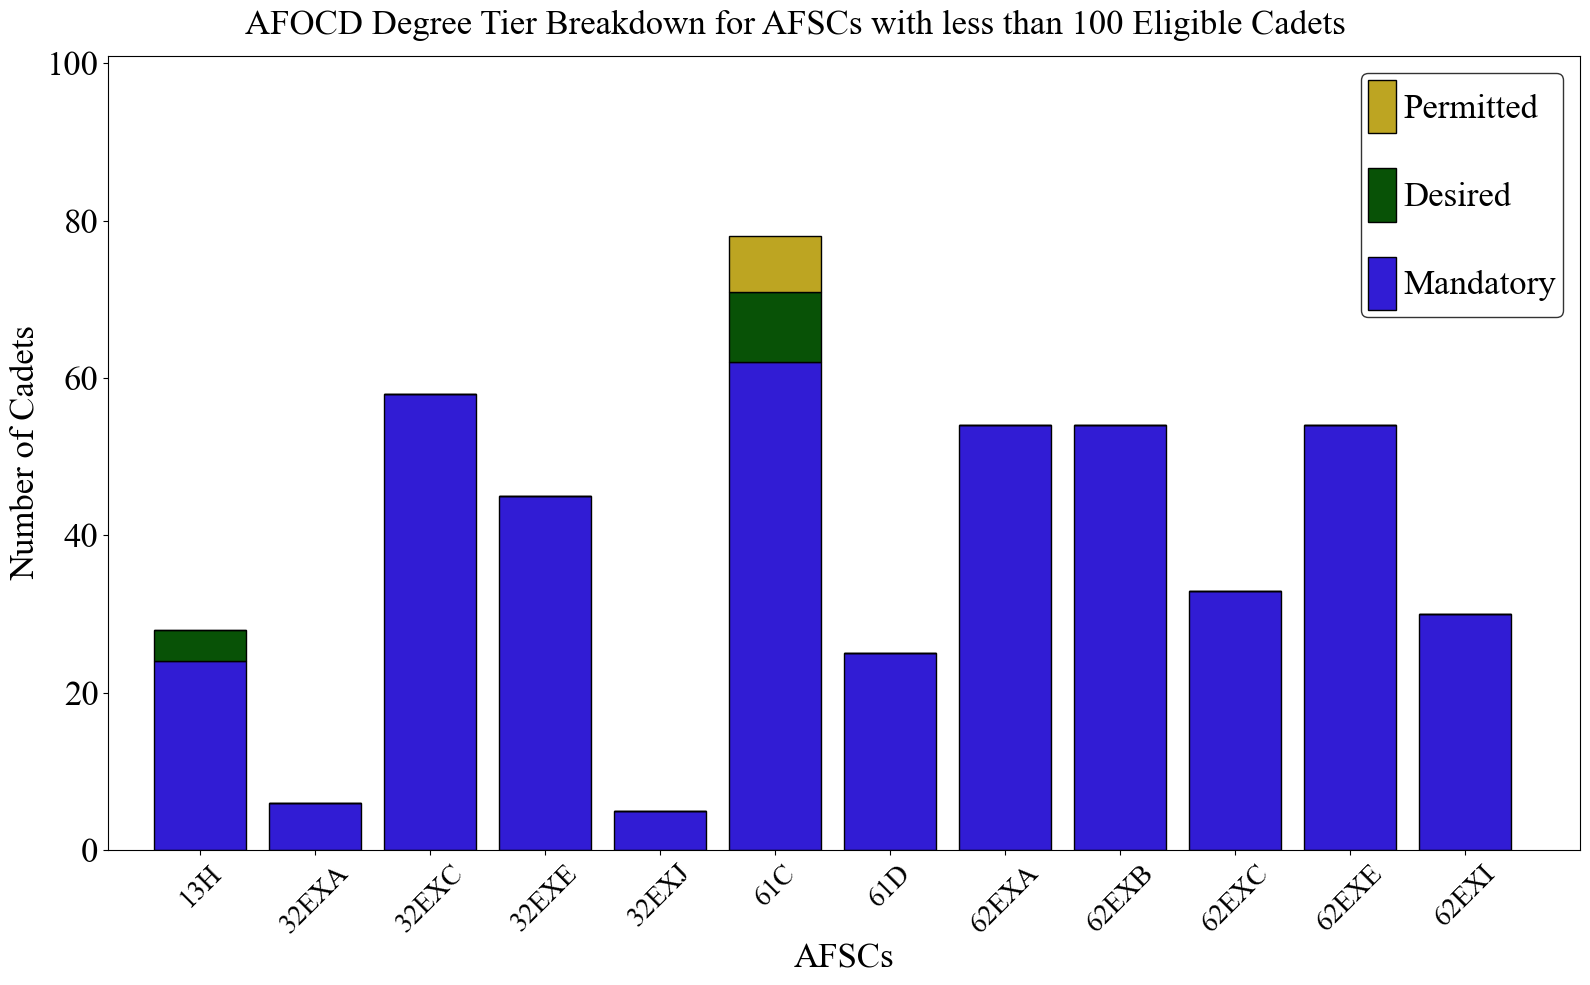

In [32]:
chart = instance.display_data_graph({"graph": 'AFOCD Data', "eligibility_limit": 100, "skip_afscs": False}) 

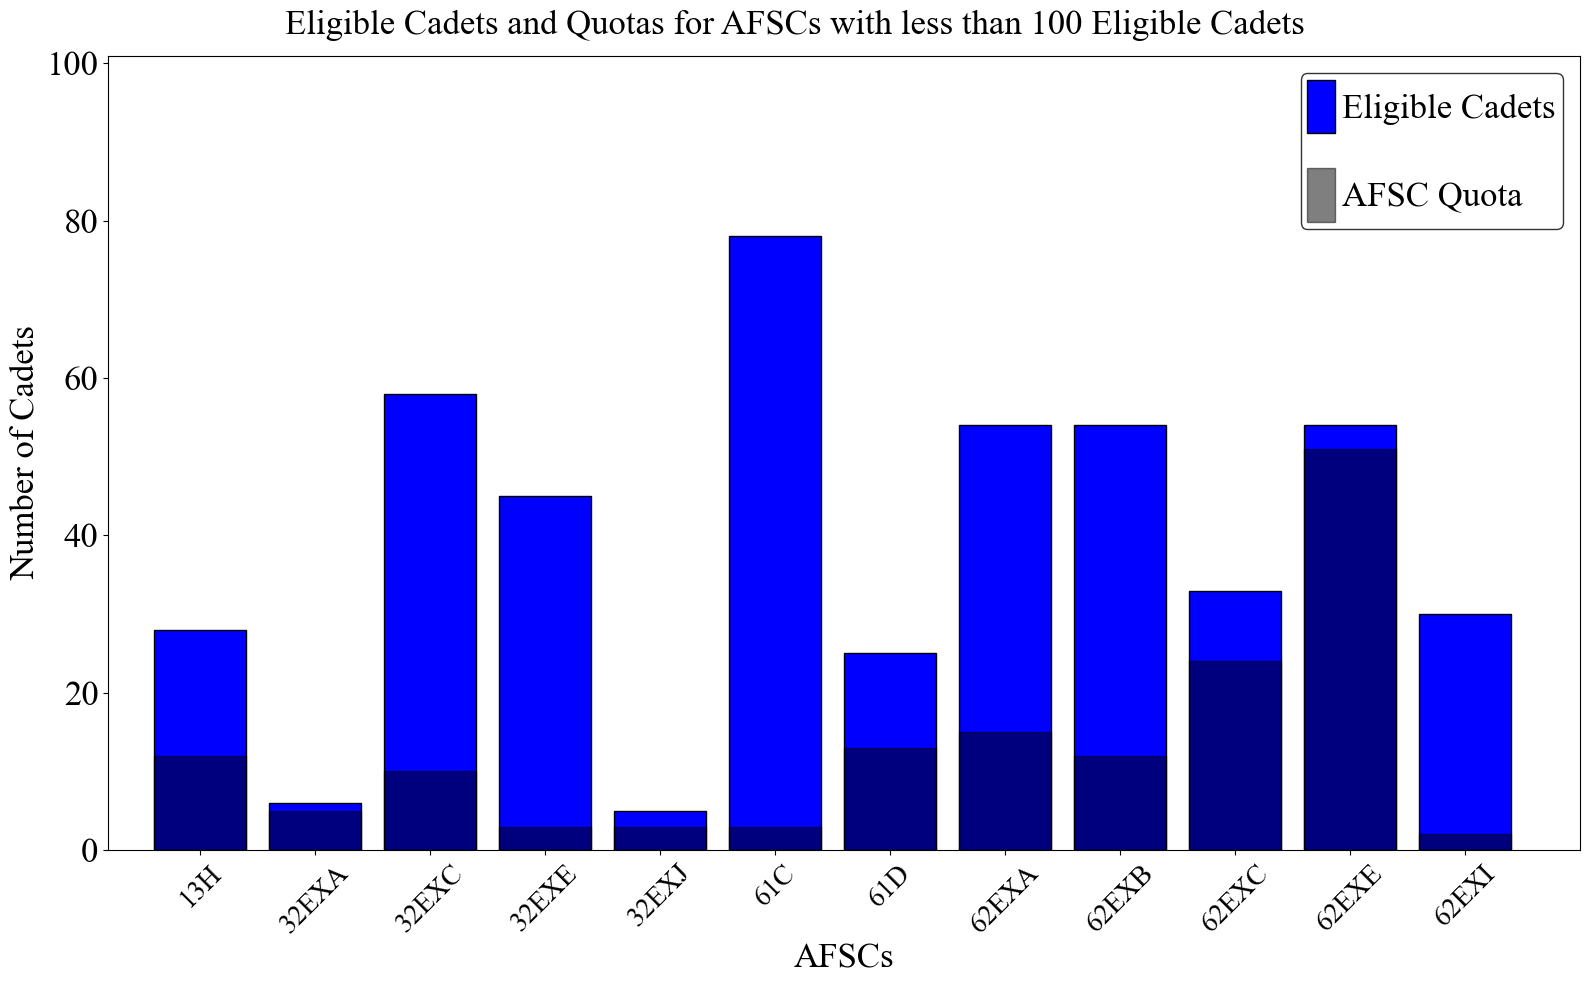

In [33]:
chart = instance.display_data_graph({"graph": 'Eligible Quota', "eligibility_limit": 100}) 

62EXE was a problem, so we had to reduce the target for that AFSC!

#### Source Code Walkthrough

Now that I've shown what you can do with the parameters that you've loaded in, I'm going to show you how they get there in the first place. The line "instance = CadetCareerProblem('2023b')" does a lot of things up front. The class object is defined in the "problem_class.py" script which is located in the afccp/core/ directory. I did my best to try to show where everything is located using the full python module names (ie. afccp.core.problem_class = afccp/core/problem_class.py) All throughout the code you will see functions defined using the full location to try to help you understand where everything is. 

If we open up problem_class.py, we will see the class defined. Let's look at its "__init__" function, which is what gets executed when we define a problem instance.

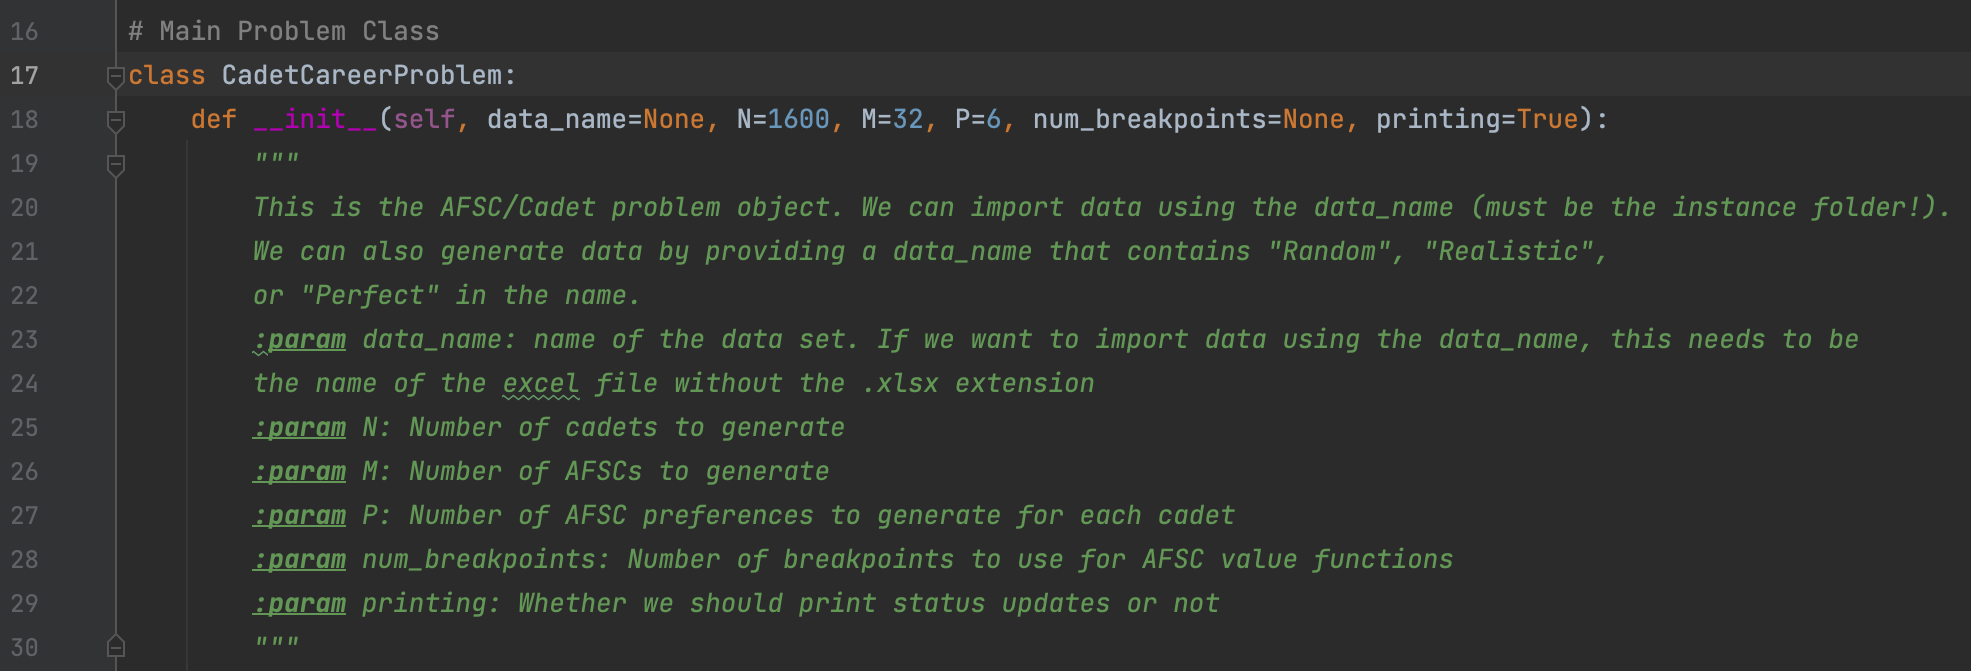

In [34]:
Image(filename='pic2.png')

Essentially, when we create a problem instance we can do one of two things: import an already existing instance, or generate a new one. 

### Value Parameters

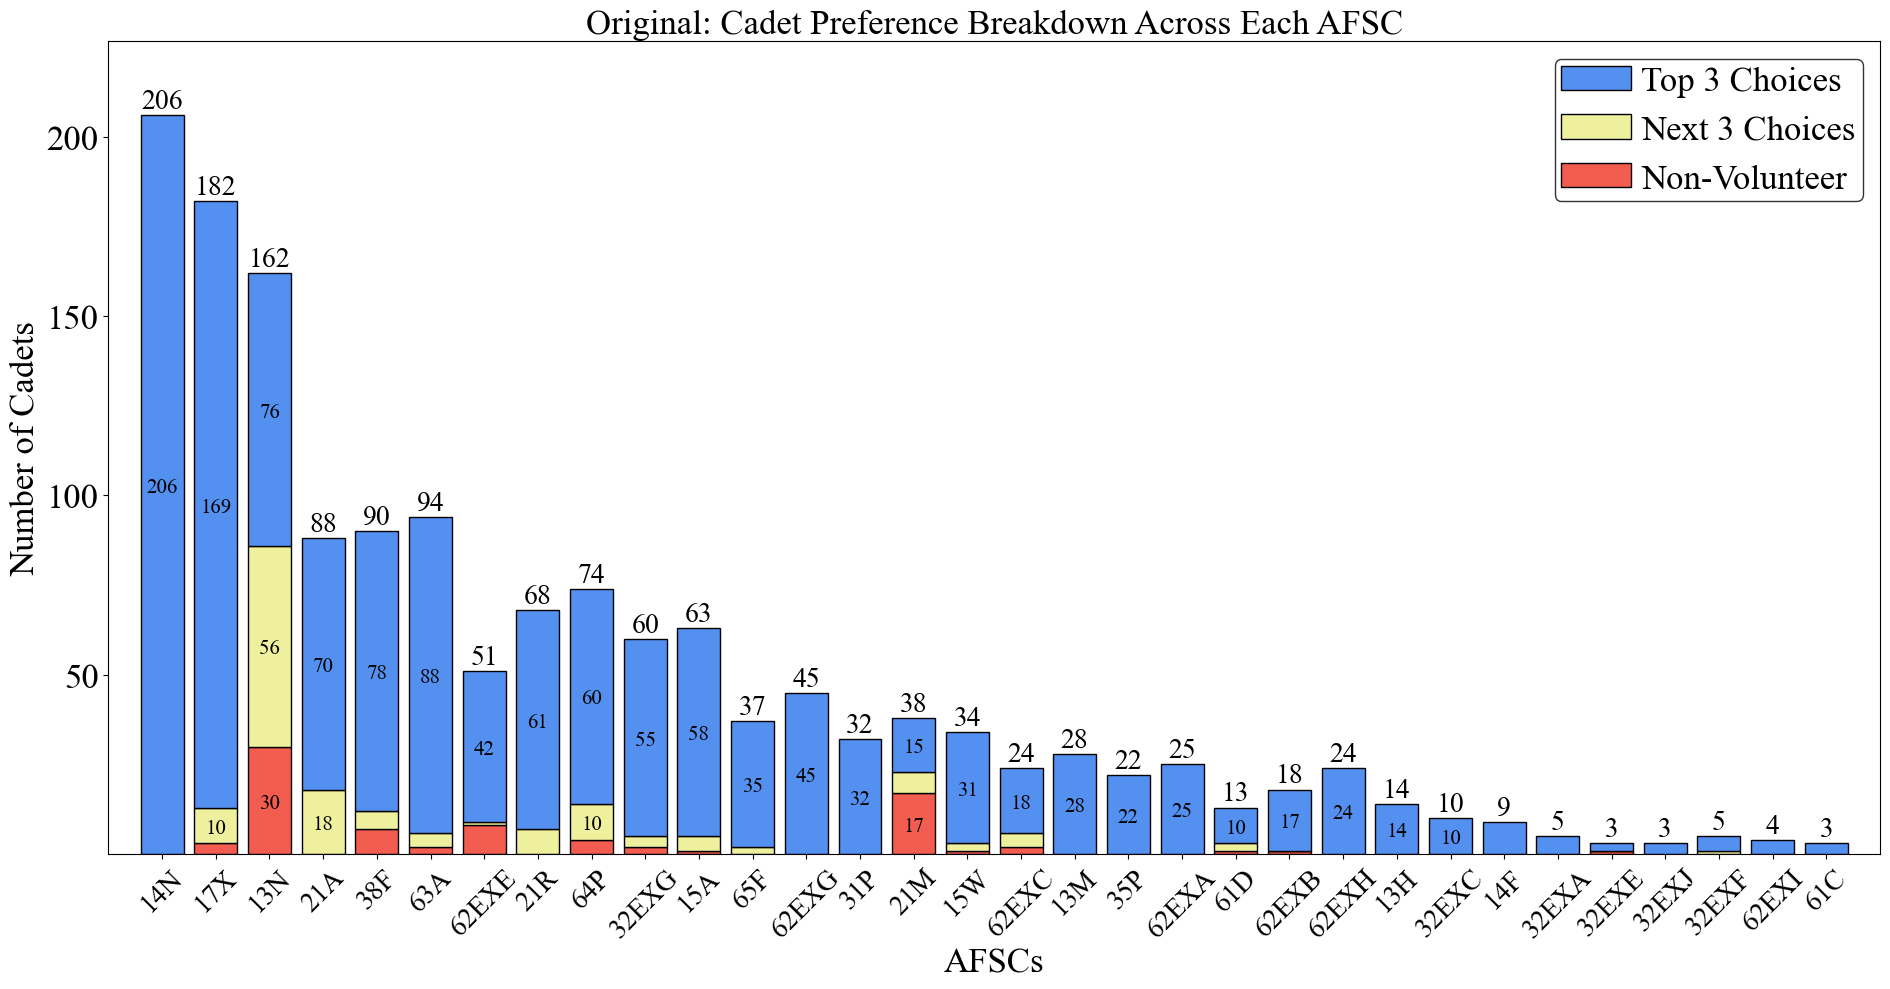

In [3]:
from IPython.display import Image
Image(filename='Original Cadet_Preference_Sorted.png')